### InceptionV3 


<br>
<hr>

In [52]:
import os 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import seaborn as sns
import glob
import time 
from PIL import Image
from scipy import ndimage, misc
import cv2 

%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")



import tensorflow as tf
from tensorflow import keras 
import tensorflow_hub as hub
from tensorflow.keras.layers import Input
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import get_file
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions
from sklearn.metrics import classification_report

In [53]:
# seed 
tf.random.set_seed(42)
np.random.seed(42)

In [65]:
(X_train, y_train), (X_test, y_test) = cifar.load_data()

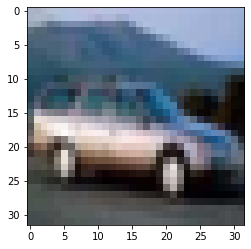

In [55]:
teste = array_to_img(X_train[4])
plt.imshow(teste)

In [5]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

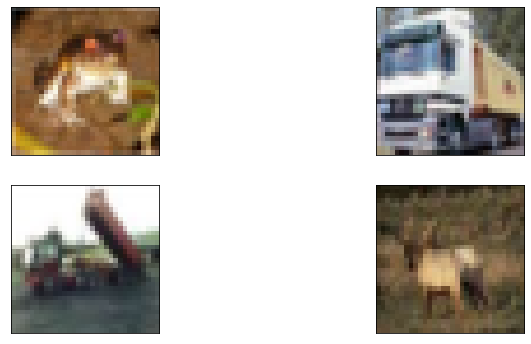

In [6]:
plt.figure(figsize=(12,6))

for image in range(0,4):
  plt.subplot(2,2, image + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[image])
#  plt.xlabel(class_names[y_train[image]])
plt.show()

In [7]:
# scaling pixels 
X_train = X_train.astype(np.float32) / 255.0
X_test = X_test.astype(np.float32) / 255.0

In [8]:
# expand dimension NOT required 
#X_train = np.expand_dims(X_train, axis=0)
#X_test = np.expand_dims(X_test, axis=0)

In [9]:
X_train.shape

(50000, 32, 32, 3)

In [10]:
# vector for binary matrix 
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

<hr>
<br>



#### InceptionV3




<br>

In [58]:
# InceptionV3 pre-trained 
inception = InceptionV3(include_top=False, weights='imagenet', input_shape=(150, 150, 3), pooling='max', classes=10)

In [59]:
# Summary InceptionV3
print(inception.summary())

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_423 (Conv2D)             (None, 74, 74, 32)   864         input_11[0][0]                   
__________________________________________________________________________________________________
batch_normalization_418 (BatchN (None, 74, 74, 32)   96          conv2d_423[0][0]                 
__________________________________________________________________________________________________
activation_418 (Activation)     (None, 74, 74, 32)   0           batch_normalization_418[0][0]    
_______________________________________________________________________________________

In [61]:
# preprocess with own InceptionV3 
X_train_new = preprocess_input(X_train, data_format="channels_last")
X_train_new.shape

(50000, 32, 32, 3)

In [64]:
pred = inception.predict(X_train_new)
print("Predicted: {}".format(decode_predictions(pred, top=10)))

ValueError: ignored